# SUMMER INTERNSHIP PROJECT

# NAME : BIRLANGI TARUN KUMAR

# COLLEGE: NATIONAL INSTITUTE OF TECHNOLOGY ,DURGAPUR

#  German traffic sign recognition benchmark#

# Install and importing libraries 

In [1]:
!pip install numpy

In [2]:
!pip install matplotlib

In [3]:
!pip install pandas

In [4]:
!pip install pathlib

In [5]:
!pip install tensorflow

In [6]:
!pip install keras

In [7]:
import numpy as np    #for numpy arrays
import matplotlib.pyplot as plt    #for plotting the graphs
import pandas as pd    #for dataframe
import os   #to access the directories and the data
from pathlib import Path    ######to get the data from the paths
import tensorflow as tf
from tensorflow.keras.preprocessing import image as image   ######for checking images
import keras
np.random.seed(42)

# DATA PREPARATION

In [8]:
# for d in dirs:
#     print(d);

In [9]:
###########Label to name ######################
lable2name = {
                0:'Speed limit (20km/h)',
                1:'Speed limit (30km/h)', 
                2:'Speed limit (50km/h)', 
                3:'Speed limit (60km/h)', 
                4:'Speed limit (70km/h)', 
                5:'Speed limit (80km/h)', 
                6:'End of speed limit (80km/h)', 
                7:'Speed limit (100km/h)', 
                8:'Speed limit (120km/h)', 
                9:'No passing', 
                10:'No passing veh over 3.5 tons', 
                11:'Right-of-way at intersection', 
                12:'Priority road', 
                13:'Yield',
                14:'Stop', 
                15:'No vehicles', 
                16:'Veh > 3.5 tons prohibited', 
                17:'No entry', 
                18:'General caution', 
                19:'Dangerous curve left', 
                20:'Dangerous curve right', 
                21:'Double curve', 
                22:'Bumpy road', 
                23:'Slippery road', 
                24:'Road narrows on the right', 
                25:'Road work', 
                26:'Traffic signals', 
                27:'Pedestrians', 
                28:'Children crossing', 
                29:'Bicycles crossing', 
                30:'Beware of ice/snow',
                31:'Wild animals crossing', 
                32:'End speed + passing limits', 
                33:'Turn right ahead', 
                34:'Turn left ahead', 
                35:'Ahead only', 
                36:'Go straight or right', 
                37:'Go straight or left', 
                38:'Keep right', 
                39:'Keep left', 
                40:'Roundabout mandatory', 
                41:'End of no passing', 
                42:'End no passing veh > 3.5 tons'
              }

In [10]:
p = Path('./Train');
dirs = p.glob("*");
dirs

<generator object Path.glob at 0x0000019C5EA0B9E0>

In [11]:
######how to get lable from the directory
###Converting those strings as the labels
### Train\0  -->>    str(d).split("\\")[-1] ---> this gives the last word(number)  thats the label

In [12]:
lables = []   ##lable array
image_data = [] ##input training images as array format
count = {}   ##using the dict to count no.of images of each type


for folder in dirs:
    lable = str(folder).split("\\")[-1];
    
    #getting every image path from that folder
    cnt = 0;
    for img_path in folder.glob("*"):
        
        ##using keras reading the imager
        img = image.load_img(img_path,target_size=(30,30));
        
        ##converting img to array
        img_data = image.img_to_array(img);
        
        ##append into image_data array
        image_data.append(img_data);
        cnt+=1;   ##counting no.of images in each sub folder
        
        ##append the ouput label in lables array
        lables.append(lable);
        #lable1 = lable2name[lable]
    count[lable2name[int(lable)]] = cnt;
    
print(count);   
    

{'Speed limit (20km/h)': 210, 'Speed limit (30km/h)': 2220, 'No passing veh over 3.5 tons': 2010, 'Right-of-way at intersection': 1320, 'Priority road': 2100, 'Yield': 2160, 'Stop': 780, 'No vehicles': 630, 'Veh > 3.5 tons prohibited': 420, 'No entry': 1110, 'General caution': 1200, 'Dangerous curve left': 210, 'Speed limit (50km/h)': 2250, 'Dangerous curve right': 360, 'Double curve': 330, 'Bumpy road': 390, 'Slippery road': 510, 'Road narrows on the right': 270, 'Road work': 1500, 'Traffic signals': 600, 'Pedestrians': 240, 'Children crossing': 540, 'Bicycles crossing': 270, 'Speed limit (60km/h)': 1410, 'Beware of ice/snow': 450, 'Wild animals crossing': 780, 'End speed + passing limits': 240, 'Turn right ahead': 689, 'Turn left ahead': 420, 'Ahead only': 1200, 'Go straight or right': 390, 'Go straight or left': 210, 'Keep right': 2070, 'Keep left': 300, 'Speed limit (70km/h)': 1980, 'Roundabout mandatory': 360, 'End of no passing': 240, 'End no passing veh > 3.5 tons': 240, 'Speed 

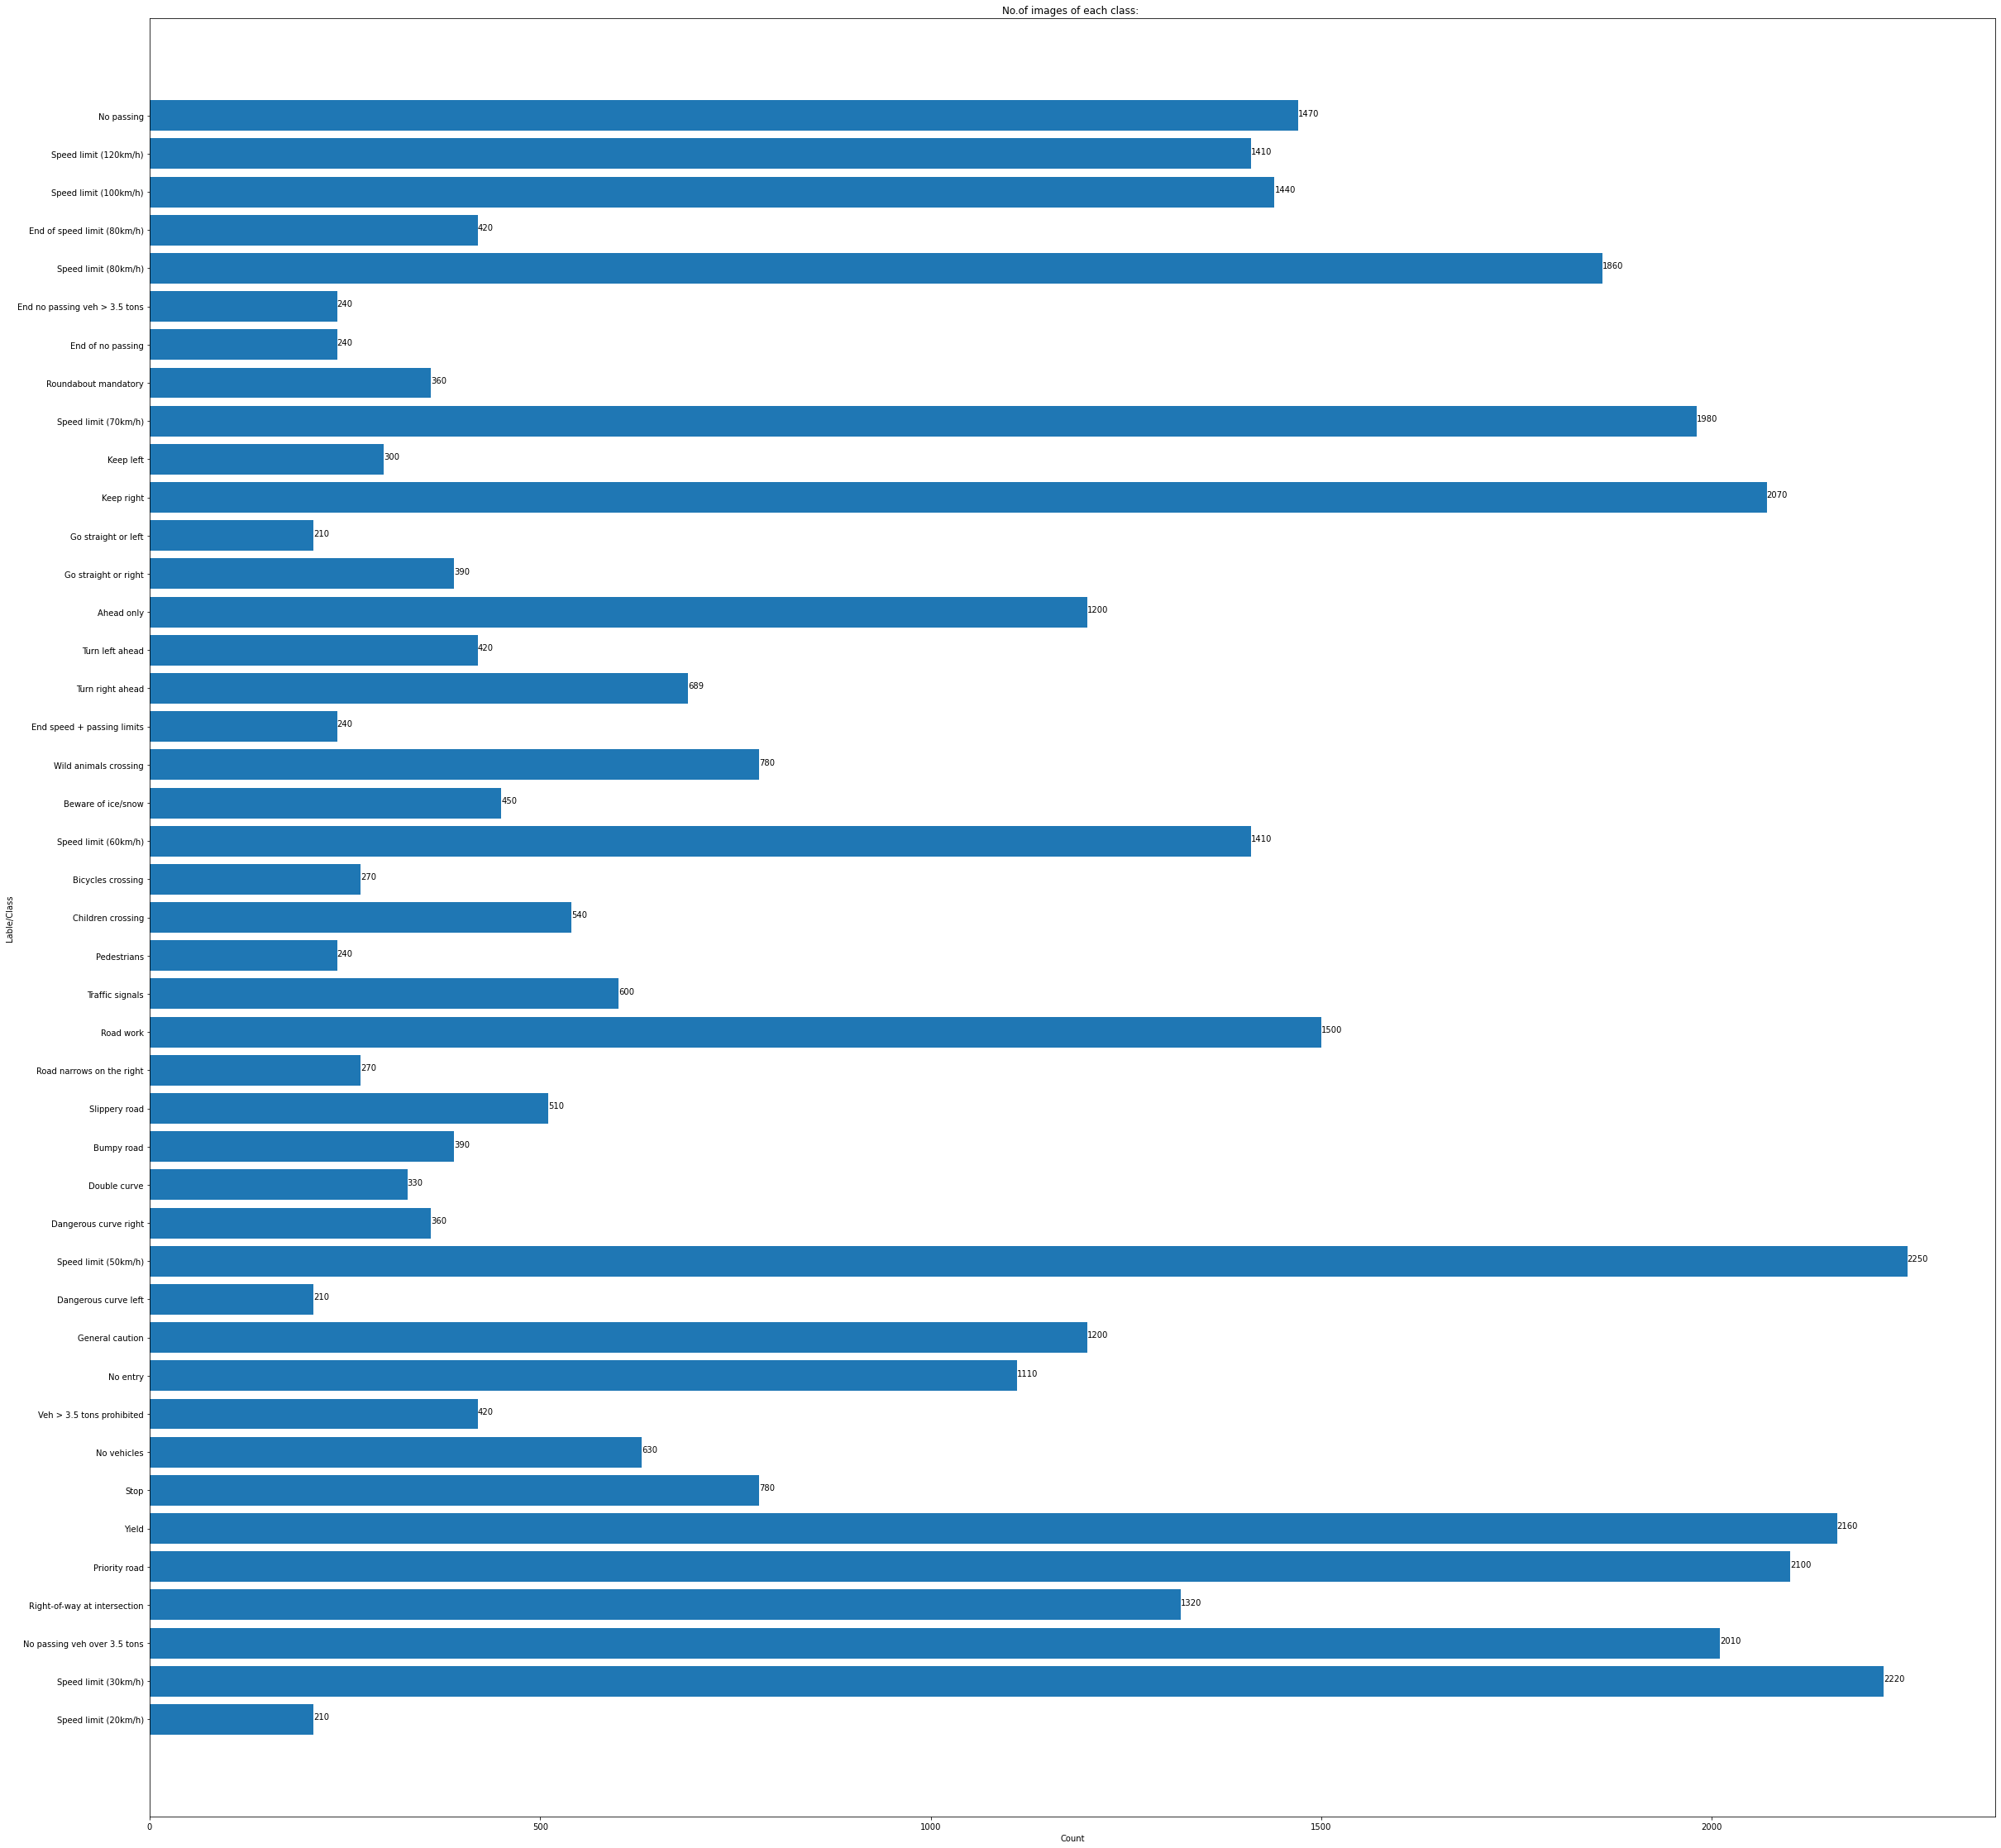

In [13]:
#####Plotting the bar graph of counts of images in each class in training set
plt.figure(figsize = (40, 40))
plt.barh(list(count.keys()),list(count.values()));
#for displaying the value on the plot
plt.title("No.of images of each class: ");
plt.xlabel("Count");
plt.ylabel("Lable/Class");
for index, value in enumerate(list(count.values())):
    plt.text(value, index, str(value))

In [14]:
#######Converting the input and output arrays to numpy arrays
X = np.array(image_data);
Y = np.array(lables);

print(X.shape);    ###40,40,3 -> image size (width,height,channels)
print(Y.shape);

(39209, 30, 30, 3)
(39209,)


In [15]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ed703ded246b9bf753580c26af7a6f7babc71006129e0327e7115c6111b31950
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [16]:
from sklearn.utils import shuffle

In [17]:
######Shuffling the data randomly
X,Y = shuffle(X,Y,random_state=2);
print(Y[0:5]);

['13' '25' '5' '18' '13']


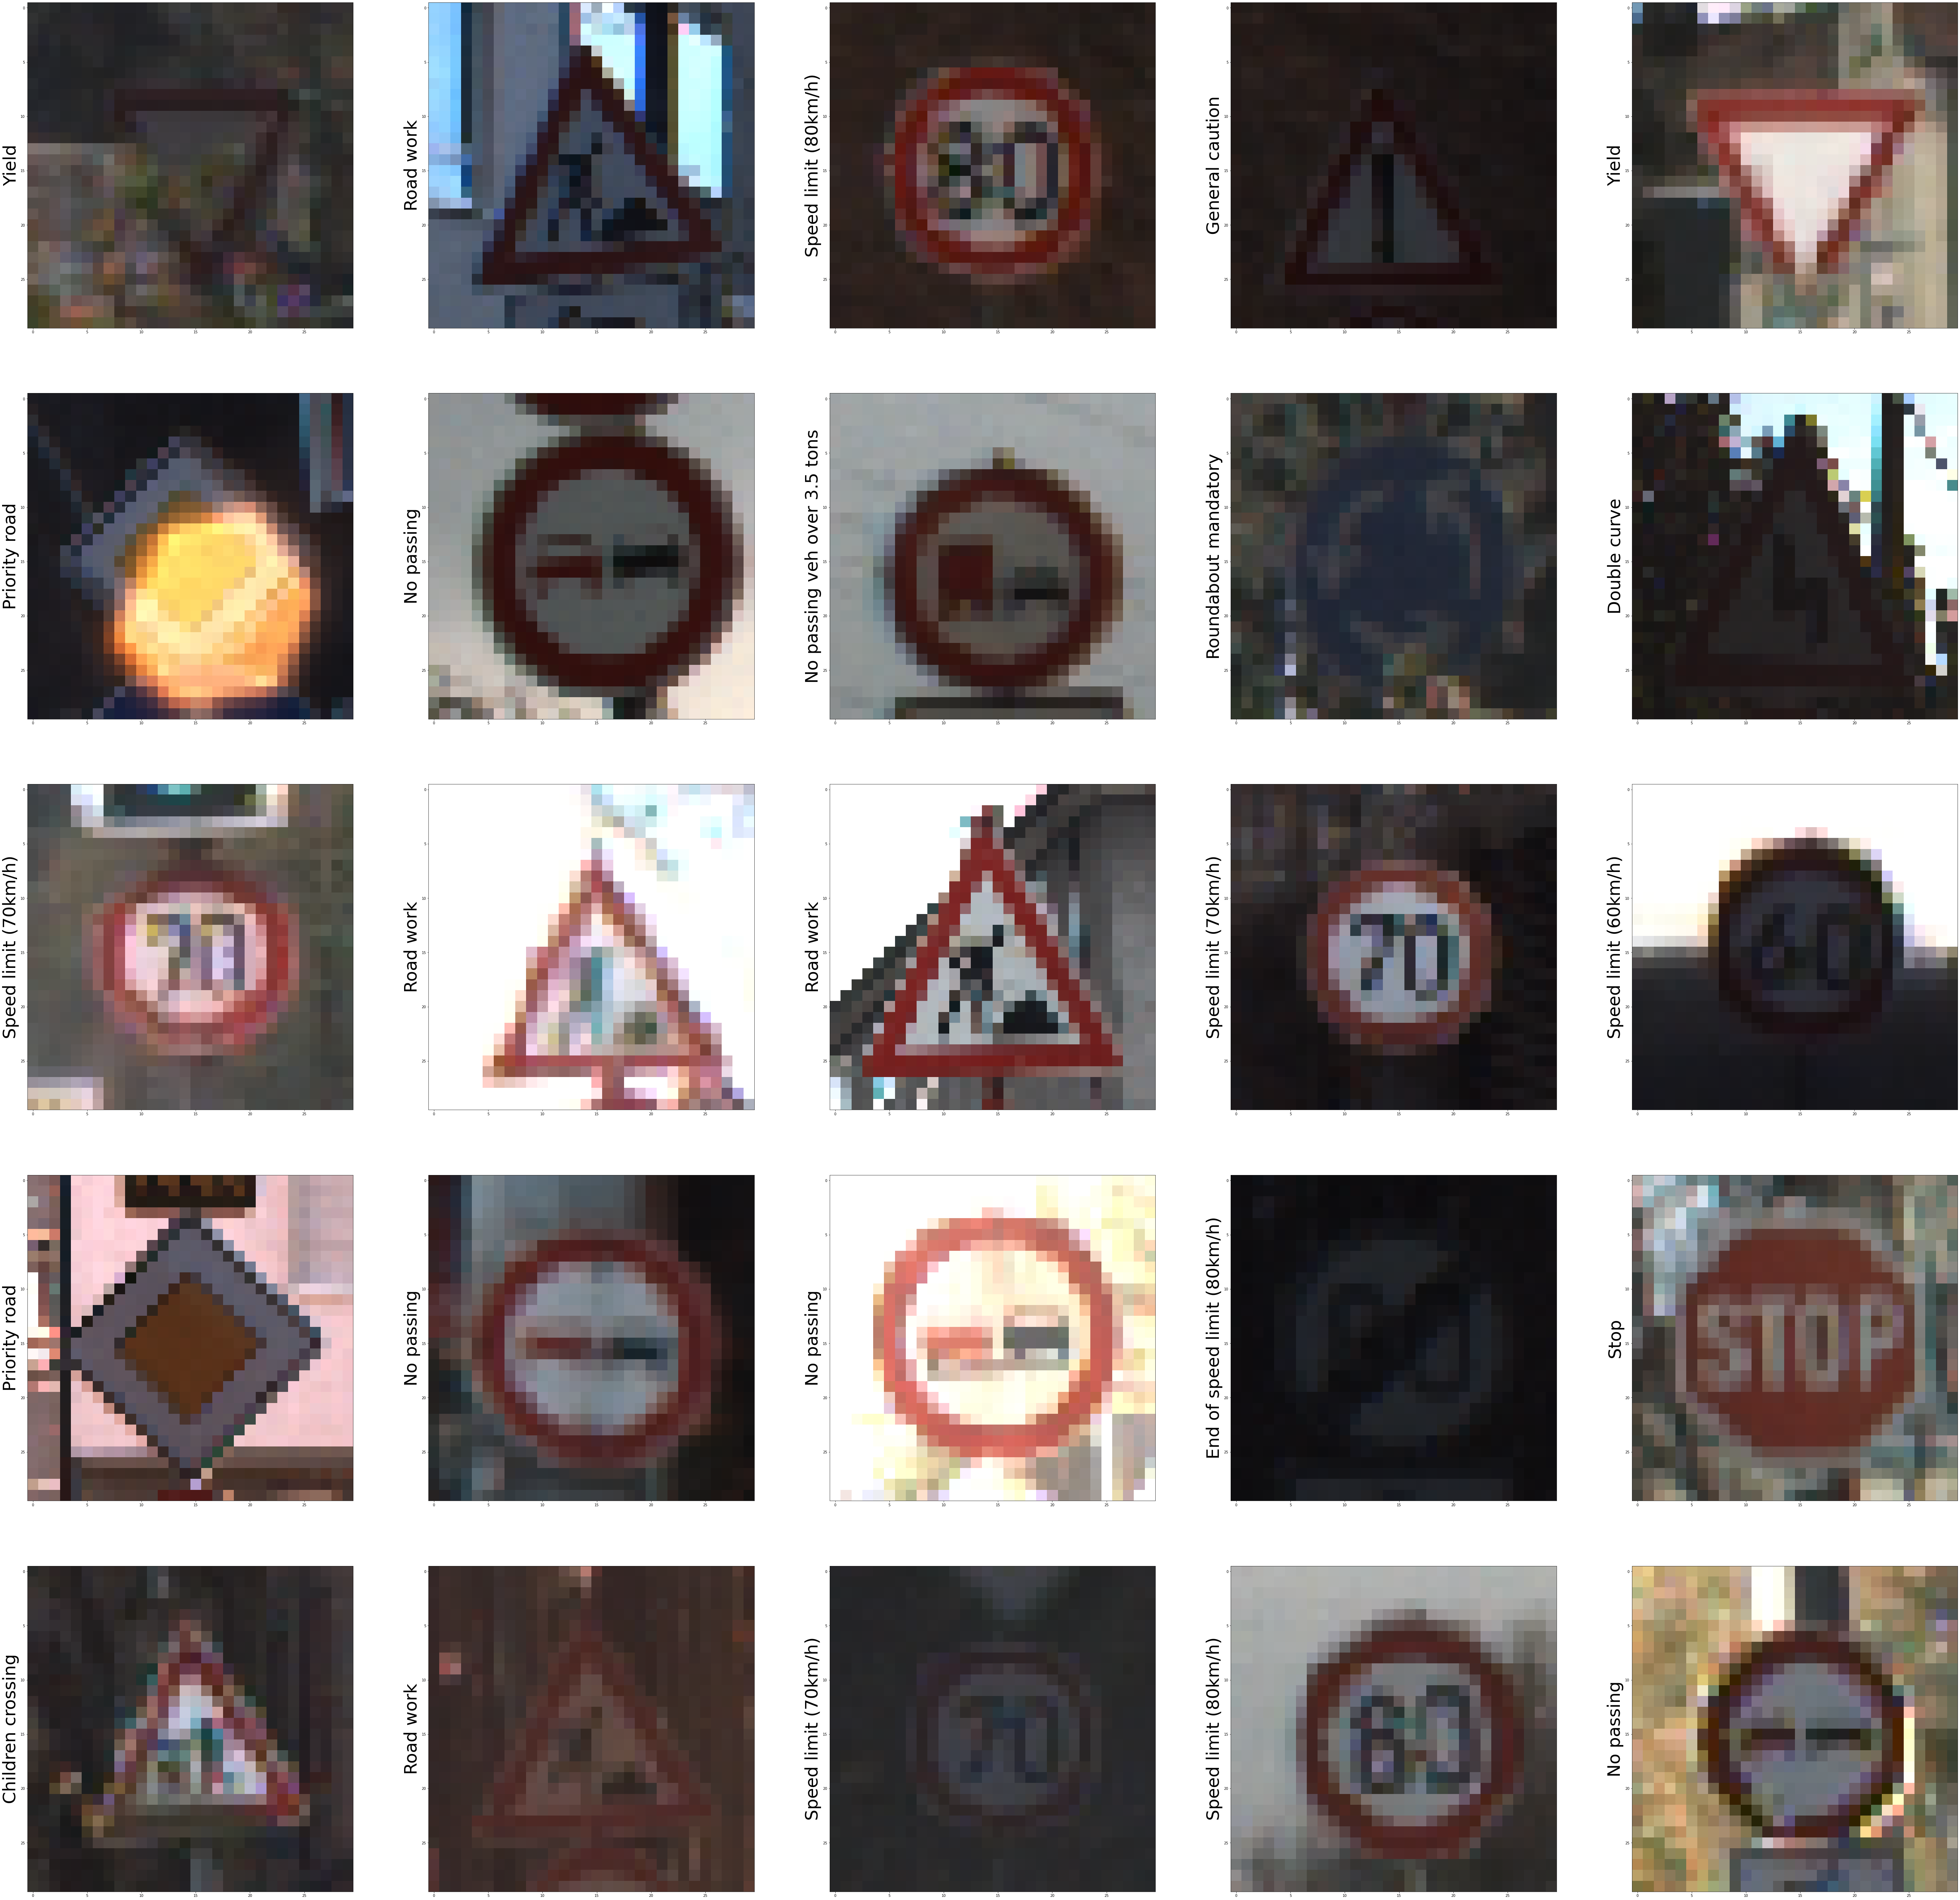

In [18]:
plt.figure(figsize = (100, 100))
for i in range(25):
    plt.subplot(5,5,i+1);
    plt.imshow(X[i]/255);
    plt.ylabel(lable2name[int(Y[i])],fontsize = 50);
plt.show();

In [19]:
#Normalizing the X by keeping values bwteen 0 & 1
X = X/255.0;

#Reshaping the X
#X = X.reshape(X.shape[0],-1);
print(X.shape)

(39209, 30, 30, 3)


In [20]:
##########Designing cnn using KERAS model

from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import to_categorical

In [21]:
#########converting y to categoral matrix [one hot vector]
###converting the size of y (n,1) to (n,43) -> probabilty of that image present in each class

Y= to_categorical(Y);

In [22]:
print(X.shape);
print(Y.shape);

(39209, 30, 30, 3)
(39209, 43)


In [23]:
######SHUFFLING RANDOM in dataset
shuffle_indexes = np.arange(X.shape[0])
np.random.shuffle(shuffle_indexes)
X = X[shuffle_indexes]
Y = Y[shuffle_indexes]

In [24]:
#Splitting the dataset into test and train set

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=20, shuffle=True)



print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", Y_train.shape)
print("y_valid.shape", Y_val.shape)

print(X_train[0:2] , Y_train[0:1]);

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367, 43)
y_valid.shape (7842, 43)
[[[[0.0627451  0.05882353 0.0627451 ]
   [0.08235294 0.07450981 0.08627451]
   [0.07843138 0.07843138 0.09411765]
   ...
   [0.08235294 0.09019608 0.10588235]
   [0.10196079 0.10196079 0.11764706]
   [0.08235294 0.09411765 0.11764706]]

  [[0.05490196 0.05882353 0.05882353]
   [0.05098039 0.05490196 0.05882353]
   [0.05098039 0.05098039 0.05882353]
   ...
   [0.10588235 0.10588235 0.1254902 ]
   [0.08235294 0.09411765 0.11372549]
   [0.06666667 0.07450981 0.09019608]]

  [[0.05882353 0.05882353 0.05882353]
   [0.0627451  0.06666667 0.07843138]
   [0.04705882 0.05098039 0.07058824]
   ...
   [0.07058824 0.07450981 0.08235294]
   [0.0627451  0.07058824 0.07843138]
   [0.07058824 0.07058824 0.07843138]]

  ...

  [[0.05490196 0.05098039 0.05490196]
   [0.05098039 0.05098039 0.05882353]
   [0.05098039 0.04705882 0.05882353]
   ...
   [0.05098039 0.05098039 0.05882353]
   [0.0

In [25]:
##########Designing cnn using KERAS model

from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [26]:
####model and layers in cnn
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [30]:
lr = 0.001    #learning rate
epochs = 10   #no.of epochs

opt = Adam(lr=lr, decay=lr / (epochs*0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [28]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

In [29]:
hist = model.fit(aug.flow(X_train, Y_train, batch_size=64), epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/10
491/491 [==============================] - 54s 107ms/step - loss: 1.2019 - accuracy: 0.6731 - val_loss: 1.2166 - val_accuracy: 0.6512
Epoch 2/10
491/491 [==============================] - 61s 124ms/step - loss: 0.2420 - accuracy: 0.9258 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 3/10
491/491 [==============================] - 54s 110ms/step - loss: 0.1361 - accuracy: 0.9577 - val_loss: 0.0554 - val_accuracy: 0.9848
Epoch 4/10
491/491 [==============================] - 58s 118ms/step - loss: 0.0904 - accuracy: 0.9718 - val_loss: 0.0381 - val_accuracy: 0.9872
Epoch 5/10
491/491 [==============================] - 90s 182ms/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.0280 - val_accuracy: 0.9918
Epoch 6/10
491/491 [==============================] - 92s 188ms/step - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0130 - val_accuracy: 0.9966
Epoch 7/10
491/491 [==============================] - 94s 190ms/step - loss: 0.0499 - accuracy: 0.9840 - val_loss: 0.0119 - val_ac

In [31]:
#to save the model
model.save("model_gtsrb.h5");

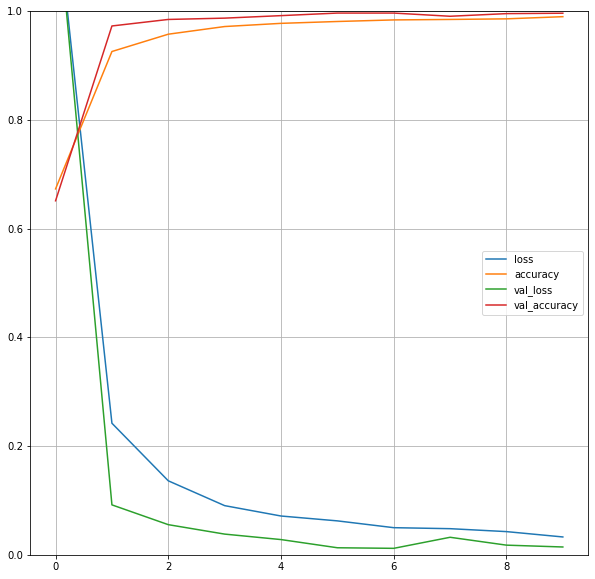

In [32]:
#Evaluating model ->
pd.DataFrame(hist.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


#loss -> loss in train set
#accuracy -> accuracy in train set
#val_loss -> loss in val set
#val_accuracy -> accuracy in val set

# Running the predictions on test dataset


In [33]:
#reading labels from dataset csv file
test = pd.read_csv("Test.csv");
print(test.head(5));

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png


In [34]:
#making them as actual labels
test_labels = test["ClassId"].values
test_labels = np.array(test_labels)
test_labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [35]:
pt  =  Path("./Test");    #path checking for train folder
image_test_data = [];

for imgtest in pt.glob("*.png"):
    
    try:
        ##using keras reading the imager
        img = image.load_img(imgtest,target_size=(30,30));

        ##converting img to array
        img_data = image.img_to_array(img);

        ##append into image_data array
        image_test_data.append(img_data);
    except:
        print("Error" + str(imgtest));

In [36]:
X_test = np.array(image_test_data);
Y_actual = np.array(test_labels);
X_test = X_test/255;
print(X_test.shape);
print(Y_actual.shape);

(12630, 30, 30, 3)
(12630,)


In [37]:
#predicting the data with model

Y_pred = np.argmax(model.predict(X_test), axis=1);
#model.predict(X_test)  -> gives the value of y_predicted in (n,43)
#np.argmax gives the index of the class which has highest value

395/395 [==============================] - 4s 8ms/step


In [38]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Test Data Accuracy: ',accuracy_score(Y_actual, Y_pred)*100)

Test Data Accuracy:  97.22882026920031


In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_actual,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      0.99      0.99       720
           2       0.97      0.99      0.98       750
           3       1.00      0.91      0.95       450
           4       0.99      0.99      0.99       660
           5       0.91      0.98      0.95       630
           6       1.00      0.97      0.98       150
           7       0.97      1.00      0.98       450
           8       1.00      0.94      0.97       450
           9       1.00      0.98      0.99       480
          10       1.00      1.00      1.00       660
          11       0.97      0.96      0.97       420
          12       0.96      1.00      0.98       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      0.99      0.99       210
          16       0.99      1.00      1.00       150
          17       1.00    

In [40]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_actual, Y_pred)
print(cf_matrix);

[[ 60   0   0 ...   0   0   0]
 [  0 716   2 ...   0   0   0]
 [  0   5 744 ...   0   0   0]
 ...
 [  0   0   0 ...  89   0   0]
 [  0   0   0 ...   0  59   0]
 [  0   0   0 ...   0   0  90]]


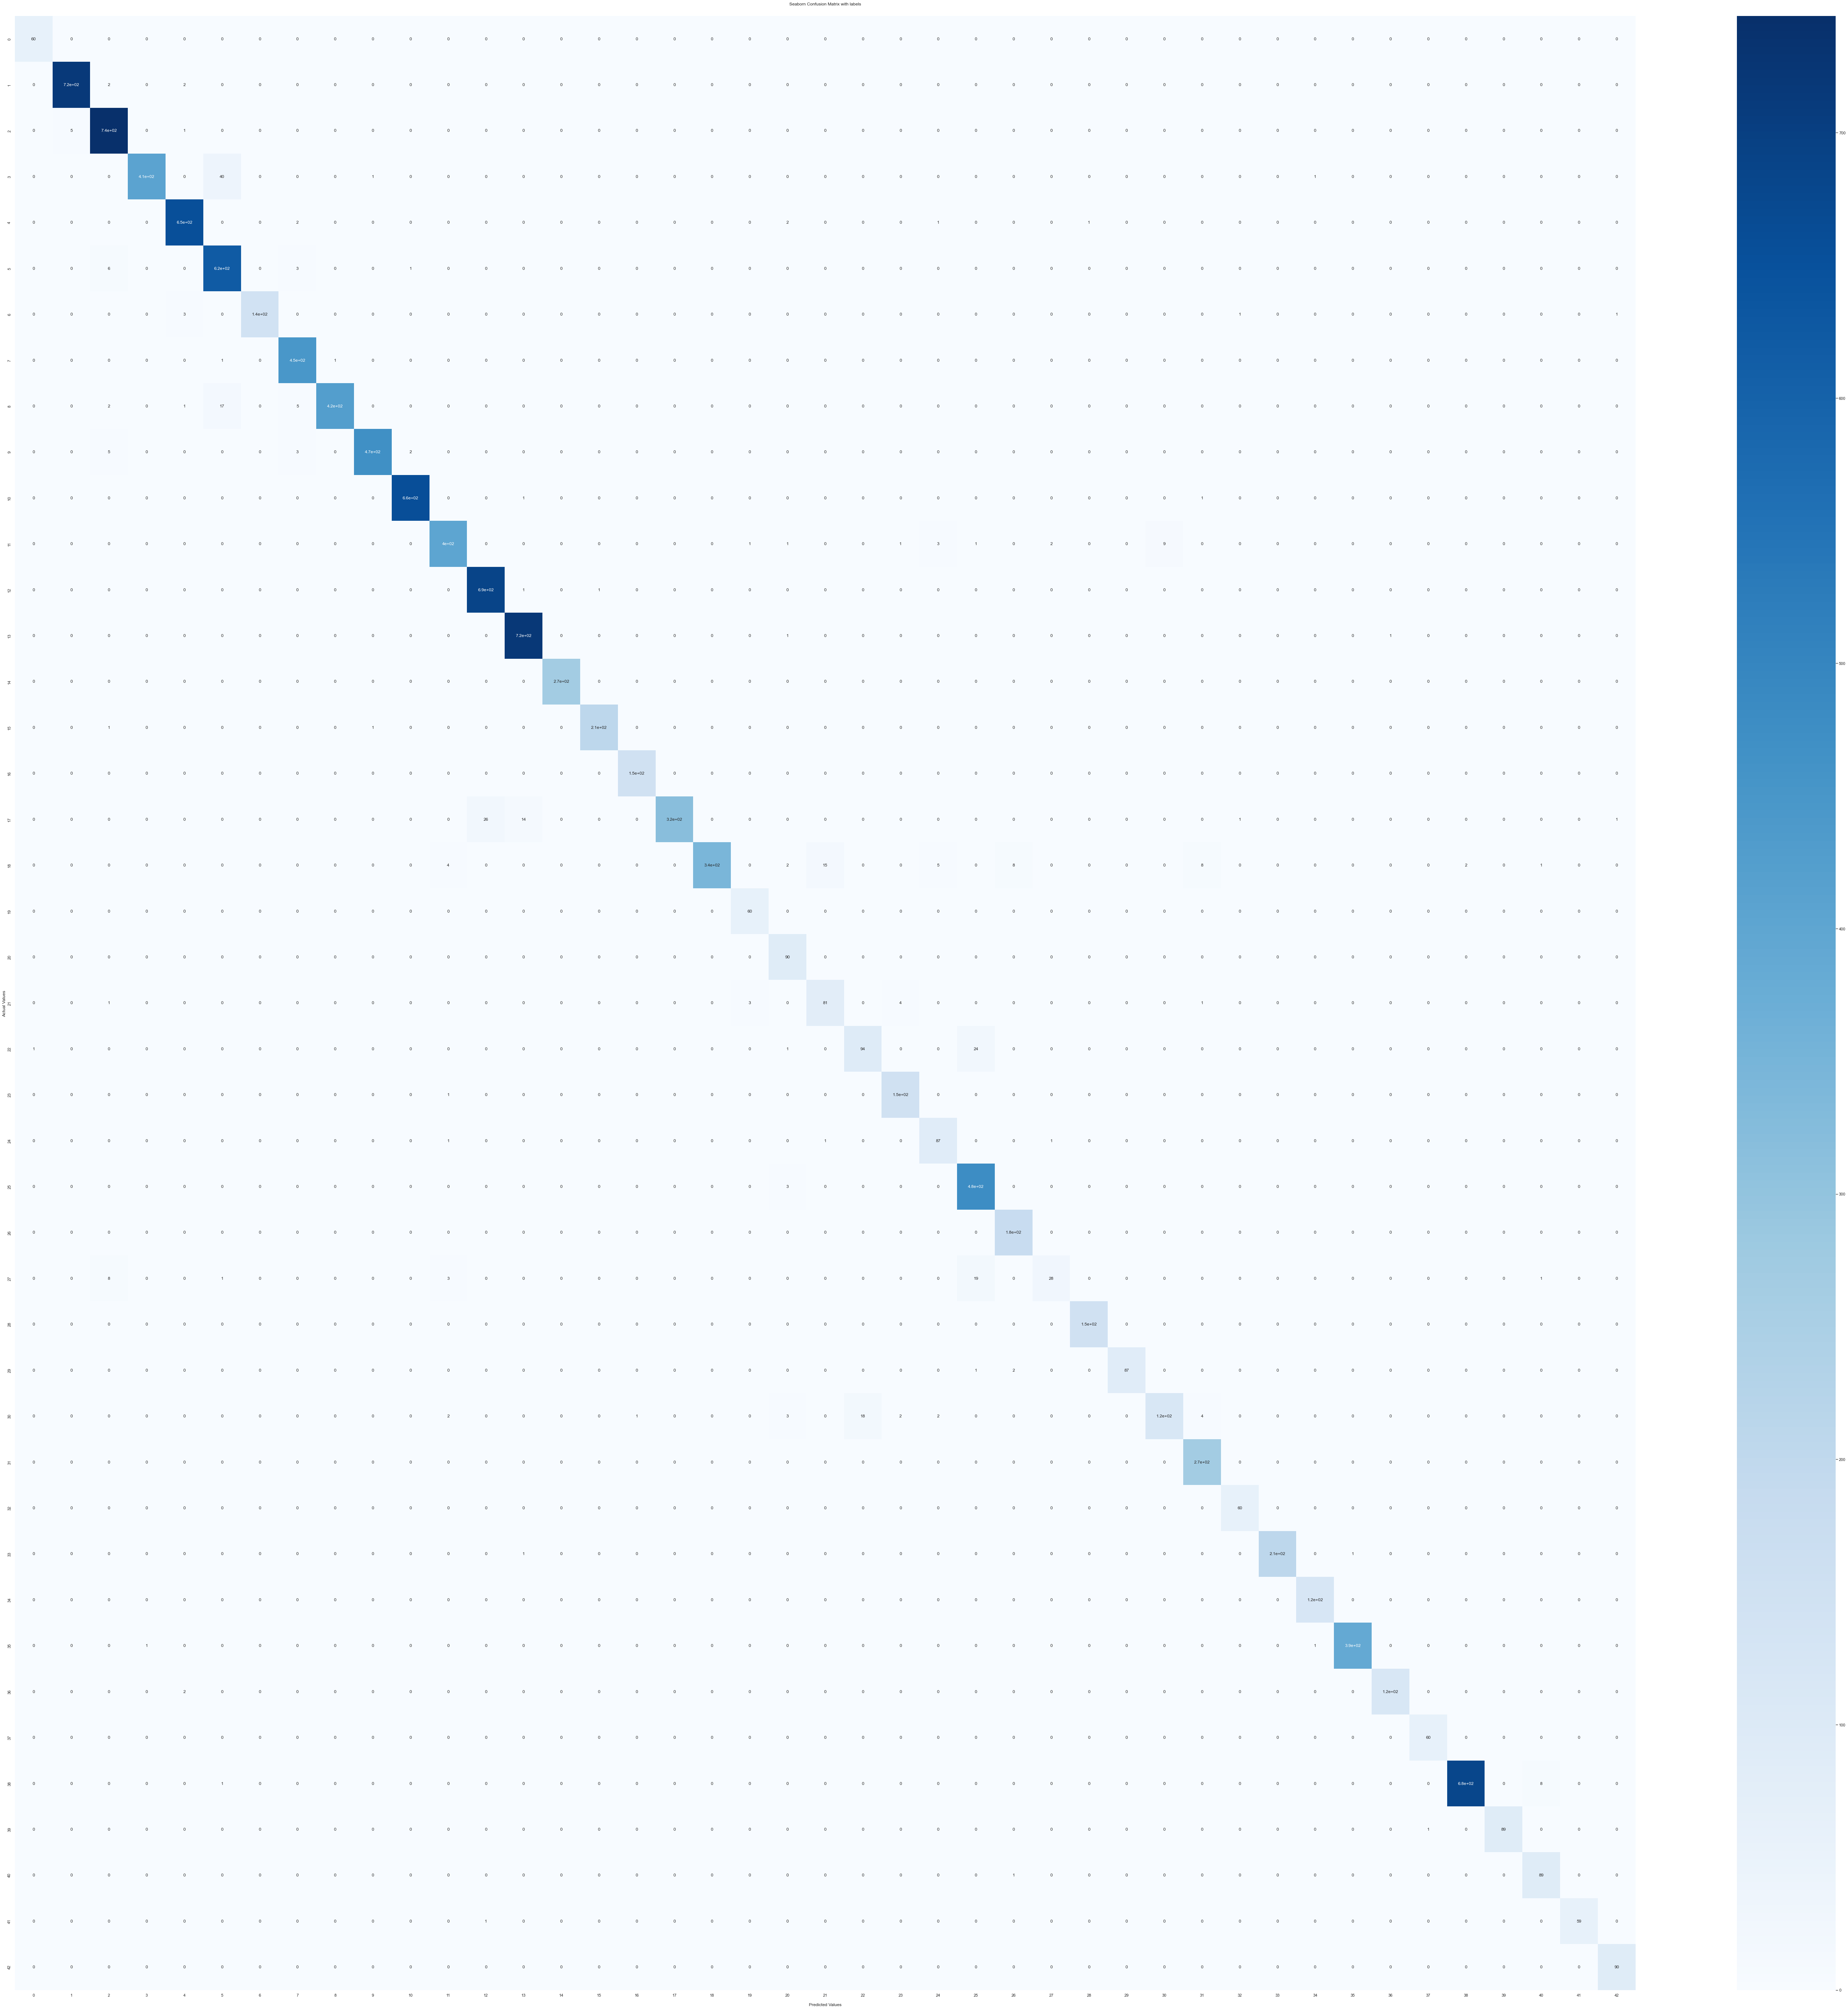

In [41]:
#Confusion matrix visualization using sns
import seaborn as sns

sns.set(rc={'figure.figsize':(100,100)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(list(lable2name.keys()));
ax.yaxis.set_ticklabels(list(lable2name.keys()));


# Prediction in test data

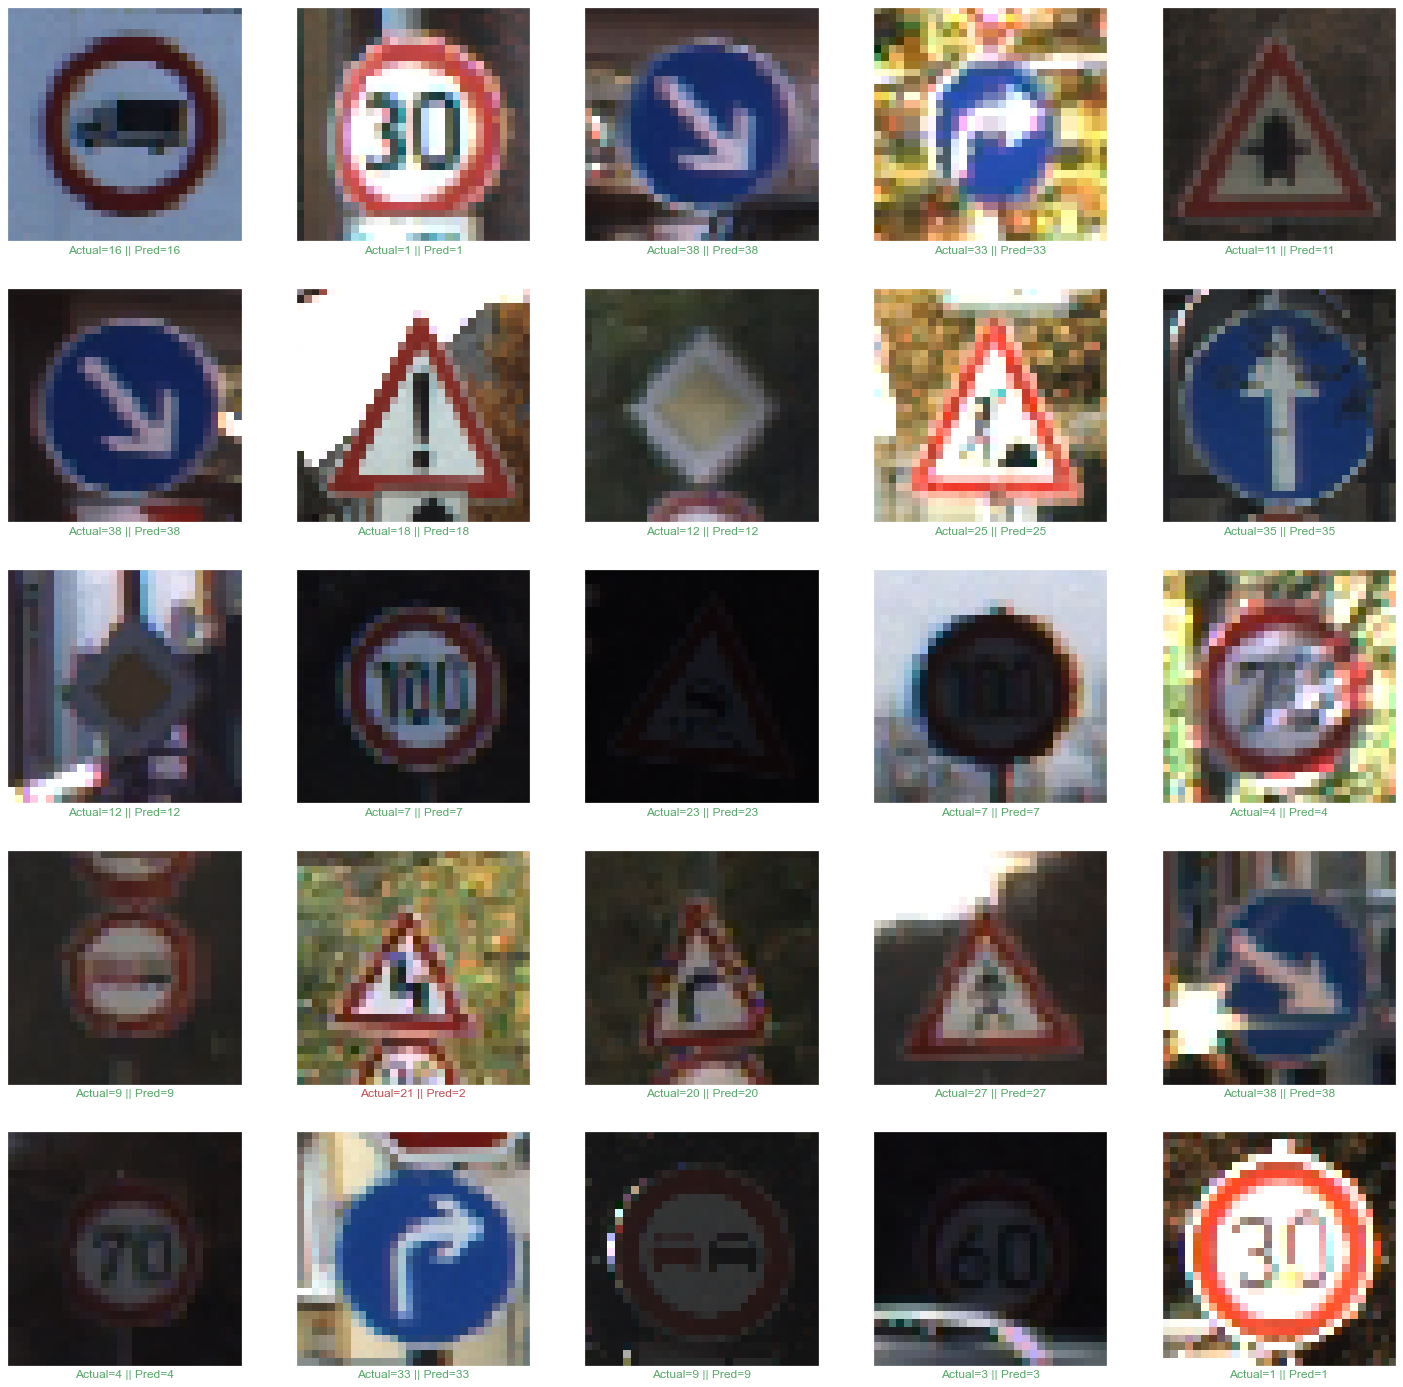

In [42]:
plt.figure(figsize = (25,25))

start_index = 0;
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction = Y_pred[start_index + i]
  actual = Y_actual[start_index + i]
  col = 'g'     #if prediction is right
  if prediction != actual:
    col = 'r'   #if prediction is wrong
  plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
  plt.imshow(X_test[start_index + i])
plt.show()